Kelompok : 06 Mata Kuliah : Data Wrangling (D)

# Proses Penerapan Data Wrangling

Pada proses data wrangling ini, di lakukan proses analisis sebagai project kelompok kami, yakni melakukan analisis bagaimana ukuran keluarga pelanggan mempengaruhi kebiasaan belanja.

Misalnya, melihat apakah pelanggan dengan keluarga yang lebih besar cenderung memiliki pengeluaran yang lebih tinggi atau memilih produk tertentu yang sesuai untuk keluarga besar.

# A. Penemuan Data 

Di lakukan identifikasi, memahami format di setiap kolom, dan menentukan informasi yang relevan untuk di analisis dari dataset Shop Customer Data

Load Library Yang Di Butuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

Load Dataset

In [2]:
print("Di Tampilkan Dataset Shop Customer Data : ")

dfs = pd.read_csv("Shop_Customer_Data.csv")
dfs

Di Tampilkan Dataset Shop Customer Data : 


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


# B. Pemformatan / Perapian Data

Di lakukan pengubahan nama dan tipe data agar kolom dari dataset Shop Customer Data lebih mudah untuk di pahami dan di mengerti

Pengubahan Nama Kolom

In [3]:
print("Di Tampilkan Pengubahan Nama Kolom pada Dataset Shop Customer Data : ")

dfs = dfs.rename(columns={'Annual Income ($)': 'Annual_Income'})
dfs = dfs.rename(columns={'Spending Score (1-100)': 'Spending_Score'})
dfs = dfs.rename(columns={'Work Experience': 'Work_Experience'})
dfs = dfs.rename(columns={'Family Size': 'Size_Family'})

print(dfs.columns)

Di Tampilkan Pengubahan Nama Kolom pada Dataset Shop Customer Data : 
Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'Profession', 'Work_Experience', 'Size_Family'],
      dtype='object')


Penampilan Jumlah Baris dan Kolom

In [4]:
print("Di Tampilkan Jumlah Kolom dan Baris pada Dataset Shop Customer Data : ")

dfs.shape

Di Tampilkan Jumlah Kolom dan Baris pada Dataset Shop Customer Data : 


(2000, 8)

Penampilan Tipe Data Pada Masing-Masing Kolom

In [5]:
print("Di Tampilkan Pengecekan Tipe Dataset Shop Customer Data : ")

dfs.dtypes

Di Tampilkan Pengecekan Tipe Dataset Shop Customer Data : 


CustomerID          int64
Gender             object
Age                 int64
Annual_Income       int64
Spending_Score      int64
Profession         object
Work_Experience     int64
Size_Family         int64
dtype: object

Pengubahan Tipe Data

In [6]:
print("Di Tampilkan Perubahan Tipe Dataset Shop Customer Data : ")

dfs['Age'] = dfs['Age'].astype(float)
dfs.dtypes

Di Tampilkan Perubahan Tipe Dataset Shop Customer Data : 


CustomerID           int64
Gender              object
Age                float64
Annual_Income        int64
Spending_Score       int64
Profession          object
Work_Experience      int64
Size_Family          int64
dtype: object

# C. Pembersihan Data

Di lakukan proses pengecekan missing value, pengecekan data duplikat, dan penghapusan kolom bertipe string untuk menanggani data yang tidak akurat dan mendeteksi outlier

Penemuan Missing Value

In [7]:
print("Di Tampilkan Missing Values Pada Dataset Shop Customer Data : ")

dfs.isnull()

Di Tampilkan Missing Values Pada Dataset Shop Customer Data : 


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Size_Family
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False


Perhitungan Jumlah Missing Value (Data Hilang)

In [8]:
print("Di Tampilkan Perhitungan Jumlah Missing Values Pada Dataset Shop Customer Data : ")

dfs.isnull().sum()

Di Tampilkan Perhitungan Jumlah Missing Values Pada Dataset Shop Customer Data : 


CustomerID          0
Gender              0
Age                 0
Annual_Income       0
Spending_Score      0
Profession         35
Work_Experience     0
Size_Family         0
dtype: int64

Penggantian Nilai Missing Value dengan Undefined

In [9]:
print("Di Tampilkan Penggantian Nilai Missing Value Dengan Undefined Pada Dataset Shop Customer Data :")

dfs['Profession'].fillna('Undefined', inplace=True)
print(dfs.isnull().sum()) 

Di Tampilkan Penggantian Nilai Missing Value Dengan Undefined Pada Dataset Shop Customer Data :
CustomerID         0
Gender             0
Age                0
Annual_Income      0
Spending_Score     0
Profession         0
Work_Experience    0
Size_Family        0
dtype: int64


Pengecekan Data Duplikat

In [10]:
print("Di Tampilkan Pengecekan Data Duplikat Pada Dataset Shop Customer Data : ")

duplikat = dfs.duplicated()
duplikat

Di Tampilkan Pengecekan Data Duplikat Pada Dataset Shop Customer Data : 


0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

Penghapusan Kolom Bertipe String

In [11]:
print("Di Tampilkan Hasil Penghapusan Kolom Pada Dataset Shop Customer Data :")

#menghapus kolom yang bertipe string
customers = dfs.drop('Gender', axis=1)
customers = customers.drop('Profession', axis=1)

#Buat instance dari kelas IsolationForest dan atur parameter-parameter yang sesuai.
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(customers)
outlier_predictions = isolation_forest.predict(customers)
outlier_indices = np.where(outlier_predictions == -1)[0]

customers['Outlier'] = outlier_predictions == -1
customers.head(10)

Di Tampilkan Hasil Penghapusan Kolom Pada Dataset Shop Customer Data :


C:\Users\dinda\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,CustomerID,Age,Annual_Income,Spending_Score,Work_Experience,Size_Family,Outlier
0,1,19.0,15000,39,1,4,False
1,2,21.0,35000,81,3,3,False
2,3,20.0,86000,6,1,1,False
3,4,23.0,59000,77,0,2,False
4,5,31.0,38000,40,2,6,False
5,6,22.0,58000,76,0,2,False
6,7,35.0,31000,6,1,3,False
7,8,23.0,84000,94,1,3,False
8,9,64.0,97000,3,0,3,False
9,10,30.0,98000,72,1,4,False


Penampilan Jumlah Outliers

In [12]:
print("Di Tampilkan Jumlah Outliers Pada Dataset Shop Customer Data :")

value_counts = customers['Outlier'].value_counts()
print(value_counts) 

Di Tampilkan Jumlah Outliers Pada Dataset Shop Customer Data :
False    1900
True      100
Name: Outlier, dtype: int64


Boxplot Outlier Dari Spending Score Dan Size Family

Di Tampilkan Boxplot Dari Spending Score Dan Size Family Pada Dataset Shop Customer Data : 


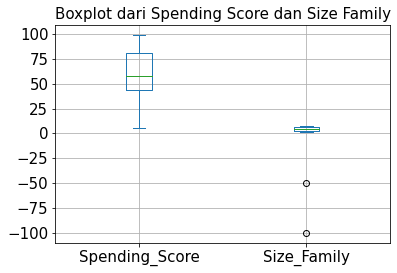

In [13]:
print("Di Tampilkan Boxplot Dari Spending Score Dan Size Family Pada Dataset Shop Customer Data : ")

df_sample = dfs[["Spending_Score", "Size_Family"]].sample(n=50).copy()
df_sample.loc[5, 'Size_Family'] = -100.0
df_sample.loc[15, 'Size_Family'] = -50.0
df_sample.plot.box()

plt.title("Boxplot dari Spending Score dan Size Family", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

# D. Transformasi Data

Di lakukan proses penerapan fungsi matematika dan penambahan kolom untuk melakukan pengkategorian keluarga dan pengkategorian tingkat pengeluaran sebagai output dari dataset ini

Kategori Keluarga Berdasarkan Size Family

In [14]:
print("Di Tampilkan Kategori Keluarga Berdasarkan Size Family Pada Dataset Shop Customer Data :")

def categorize_family_size(size):
    if size <= 3:
        return 'Kecil'
    elif size <= 6:
        return 'Sedang'
    else:
        return 'Besar'

customers['Family_Size_Category'] = customers['Size_Family'].apply(categorize_family_size)
customers['Family_Size_Category']

Di Tampilkan Kategori Keluarga Berdasarkan Size Family Pada Dataset Shop Customer Data :


0       Sedang
1        Kecil
2        Kecil
3        Kecil
4       Sedang
         ...  
1995     Besar
1996     Besar
1997     Kecil
1998     Kecil
1999     Kecil
Name: Family_Size_Category, Length: 2000, dtype: object

Penambahan Kolom Expenditure Income Rasio

In [15]:
print("Di Tampilkan Penambahan Kolom Expenditure Income Ratio Pada Dataset Shop Customer Data :")

customers['Expenditure_Income_Ratio'] = customers['Size_Family'] / customers['Annual_Income']
customers.head(10)

Di Tampilkan Penambahan Kolom Expenditure Income Ratio Pada Dataset Shop Customer Data :


,CustomerID,Age,Annual_Income,Spending_Score,Work_Experience,Size_Family,Outlier,Family_Size_Category,Expenditure_Income_Ratio
0,1,19.0,15000,39,1,4,False,Sedang,0.000267
1,2,21.0,35000,81,3,3,False,Kecil,0.000086
2,3,20.0,86000,6,1,1,False,Kecil,0.000012
3,4,23.0,59000,77,0,2,False,Kecil,0.000034
4,5,31.0,38000,40,2,6,False,Sedang,0.000158
5,6,22.0,58000,76,0,2,False,Kecil,0.000034
6,7,35.0,31000,6,1,3,False,Kecil,0.000097
7,8,23.0,84000,94,1,3,False,Kecil,0.000036
8,9,64.0,97000,3,0,3,False,Kecil,0.000031
9,10,30.0,98000,72,1,4,False,Sedang,0.000041


Penambahan Kolom Size Family Scaled

In [16]:
print("Di Tampilkan Penambahan Kolom Size Family Scaled Pada Dataset Shop Customer Data :")

scaler = StandardScaler()
customers['Size_Family_Scaled'] = scaler.fit_transform(customers[['Size_Family']])

customers.head()

Di Tampilkan Penambahan Kolom Size Family Scaled Pada Dataset Shop Customer Data :


,CustomerID,Age,Annual_Income,Spending_Score,Work_Experience,Size_Family,Outlier,Family_Size_Category,Expenditure_Income_Ratio,Size_Family_Scaled
0,1,19.0,15000,39,1,4,False,Sedang,0.000267,0.117497
1,2,21.0,35000,81,3,3,False,Kecil,0.000086,-0.390051
2,3,20.0,86000,6,1,1,False,Kecil,0.000012,-1.405148
3,4,23.0,59000,77,0,2,False,Kecil,0.000034,-0.897599
4,5,31.0,38000,40,2,6,False,Sedang,0.000158,1.132594


Penampilan Nama Kolom Setelah Proses Penghapusan Dan Penambahan

In [17]:
print("Di Tampilkan Nama Kolom Setelah Proses Penghapusan Dan Penambahan Pada Dataset Shop Customer Data :") 

print(customers.columns)

Di Tampilkan Nama Kolom Setelah Proses Penghapusan Dan Penambahan Pada Dataset Shop Customer Data :
Index(['CustomerID', 'Age', 'Annual_Income', 'Spending_Score',
       'Work_Experience', 'Size_Family', 'Outlier', 'Family_Size_Category',
       'Expenditure_Income_Ratio', 'Size_Family_Scaled'],
      dtype='object')


Penampilan Rata-Rata Gaji, Gaji Tertinggi, Dan Gaji Terendah

In [18]:
ai = customers['Annual_Income']

print("Di Tampilkan Rata-Rata Gaji: ", ai.mean())
print("Di Tampilkan Gaji Tertinggi: ", ai.max())
print("Di Tampilkan Gaji Terendah: ", ai.min())

Di Tampilkan Rata-Rata Gaji:  110731.8215
Di Tampilkan Gaji Tertinggi:  189974
Di Tampilkan Gaji Terendah:  0


Penampilan Jumlah Keluarga Berdasarkan Kategori Ukuran Keluarga

In [19]:
print("Di Tampilkan Jumlah Keluarga Berdasarkan Kategori Ukuran Keluarga Pada Dataset Shop Customer Data :")

Family_Size_Counts = customers['Family_Size_Category'].value_counts()

print(Family_Size_Counts)

Di Tampilkan Jumlah Keluarga Berdasarkan Kategori Ukuran Keluarga Pada Dataset Shop Customer Data :
Kecil     971
Sedang    790
Besar     239
Name: Family_Size_Category, dtype: int64


Pengelompokkan Tingkatan Pengeluaran 

In [20]:
print("DI Tampilkan Pengelompokkan Tingkatan Pengeluaran Pada Dataset Shop Customer Data :")

# Membuat fungsi untuk mengelompokkan tingkatan pengeluaran
def expenditure_category(row):
    if row['Family_Size_Category'] == 'Kecil':
        if row['Expenditure_Income_Ratio'] < 0.2:
            return 'Rendah'
        elif row['Expenditure_Income_Ratio'] < 0.4:
            return 'Sedang'
        else:
            return 'Tinggi'
    elif row['Family_Size_Category'] == 'Sedang':
        if row['Expenditure_Income_Ratio'] < 0.3:
            return 'Rendah'
        elif row['Expenditure_Income_Ratio'] < 0.6:
            return 'Sedang'
        else:
            return 'Tinggi'
    elif row['Family_Size_Category'] == 'Besar':
        if row['Expenditure_Income_Ratio'] < 0.4:
            return 'Rendah'
        elif row['Expenditure_Income_Ratio'] < 0.7:
            return 'Sedang'
        else:
            return 'Tinggi'

# Menerapkan fungsi pada setiap baris data
customers['Expenditure_Category'] = customers.apply(expenditure_category, axis=1)

Expenditure_Category_Counts = customers['Expenditure_Category'].value_counts()

print(Expenditure_Category_Counts)

DI Tampilkan Pengelompokkan Tingkatan Pengeluaran Pada Dataset Shop Customer Data :
Rendah    1998
Tinggi       2
Name: Expenditure_Category, dtype: int64


Penampilan DataFrame Dari Dataset Yang Telah Di Proses

In [21]:
customers

,CustomerID,Age,Annual_Income,Spending_Score,Work_Experience,Size_Family,Outlier,Family_Size_Category,Expenditure_Income_Ratio,Size_Family_Scaled,Expenditure_Category
0,1,19.0,15000,39,1,4,False,Sedang,0.000267,0.117497,Rendah
1,2,21.0,35000,81,3,3,False,Kecil,0.000086,-0.390051,Rendah
2,3,20.0,86000,6,1,1,False,Kecil,0.000012,-1.405148,Rendah
3,4,23.0,59000,77,0,2,False,Kecil,0.000034,-0.897599,Rendah
4,5,31.0,38000,40,2,6,False,Sedang,0.000158,1.132594,Rendah
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71.0,184387,40,8,7,True,Besar,0.000038,1.640142,Rendah
1996,1997,91.0,73158,32,7,7,False,Besar,0.000096,1.640142,Rendah
1997,1998,87.0,90961,14,9,2,False,Kecil,0.000022,-0.897599,Rendah
1998,1999,77.0,182109,4,7,2,True,Kecil,0.000011,-0.897599,Rendah


# E. Visualisasi Data

Di lakukan proses pembuatan histogram dan scatter plot antara hubungan kolom Total_Members dengan Spending Score

Penampilan Histogram Data Customers Pada Dataset Shop Customers Data

Di Tampilkan Histogram Data Customers Pada Dataset Shop Customers Data :


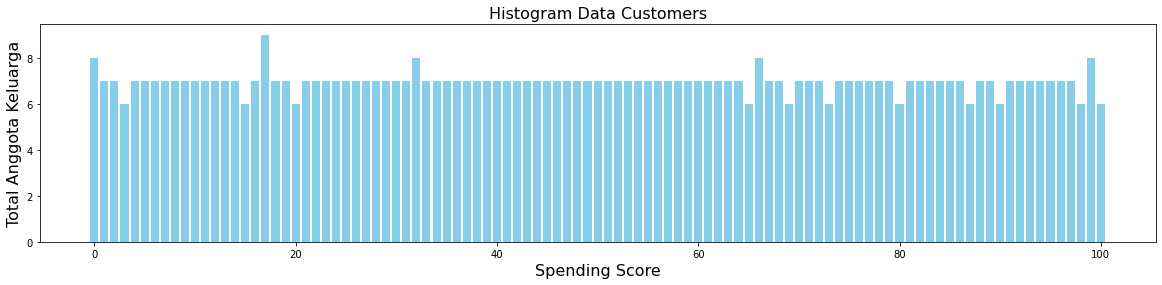

In [22]:
print("Di Tampilkan Histogram Data Customers Pada Dataset Shop Customers Data :")

plt.figure(figsize=(20, 4))
plt.title("Histogram Data Customers", fontsize=16)
plt.bar(customers['Spending_Score'], height=customers['Size_Family'], color='skyblue')
plt.xlabel("Spending Score", fontsize=16)
plt.ylabel("Total Anggota Keluarga", fontsize=16)
plt.show()

Penampilan Scatter Plot Dari Spending Score Vs Total Members

Di Tampilkan Scatter Plot Dari Spending Score Vs Size Family :


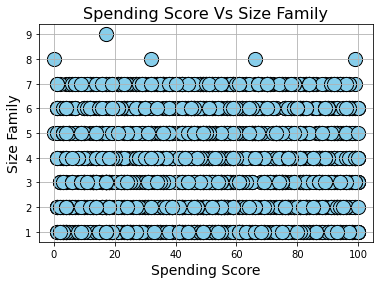

In [23]:
print("Di Tampilkan Scatter Plot Dari Spending Score Vs Size Family :")

customers.plot.scatter('Spending_Score', 'Size_Family', s=200,\
                 c='skyblue',edgecolor='k')
plt.grid(True)
plt.title('Spending Score Vs Size Family',fontsize=16)
plt.xlabel('Spending Score',fontsize=14)
plt.ylabel('Size Family',fontsize=14)
plt.show()

# F. SQL

Di lakukan proses manipulasi data menggunakan basis data relasional dengan penerapan CRUD

Proses Create Database 

In [24]:
import sqlite3

data_entry = pd.DataFrame(customers)

#Membuat koneksi SQL ke database SQLite
con = sqlite3.connect("customers_data.db", timeout=10)

#Menyimpan DataFrame ke tabel 'df_fit' dalam database
data_entry.to_sql('customers', con, if_exists='replace', index=False)

print("Database dengan nama customers_data.db berhasil di buat")

#Menutup koneksi
con.close()

Database dengan nama customers_data.db berhasil di buat


Proses Penambahan Data

In [25]:
import sqlite3

con = sqlite3.connect("customers_data.db", timeout = 10)
cur = con.cursor()

for row in cur.execute("INSERT INTO customers VALUES (2001, 46.0, 114435, 34, 8, 3, 0, 'Kecil', 2.62157556691572e-05,\
                        -0.390050884039215, 'Rendah')"):
    print(row)
con.commit()

print("1 data berhasil di tambahkan")

con.close()

1 data berhasil di tambahkan


Proses Pembacaan Data Yang Terdapat Dalam Database

In [26]:
print("Di Tampilkan Data dari Dataset Pada SQL :")

con = sqlite3.connect("customers_data.db", timeout=10)
cur = con.cursor()

for row in cur.execute("SELECT * FROM customers"):
    print(row)
con.commit()

con.close()

Di Tampilkan Data dari Dataset Pada SQL :
(1, 19.0, 15000, 39, 1, 4, 0, 'Sedang', 0.0002666666666666667, 0.11749743611591194, 'Rendah')
(2, 21.0, 35000, 81, 3, 3, 0, 'Kecil', 8.571428571428571e-05, -0.3900508840392152, 'Rendah')
(3, 20.0, 86000, 6, 1, 1, 0, 'Kecil', 1.1627906976744185e-05, -1.4051475243494693, 'Rendah')
(4, 23.0, 59000, 77, 0, 2, 0, 'Kecil', 3.389830508474576e-05, -0.8975992041943422, 'Rendah')
(5, 31.0, 38000, 40, 2, 6, 0, 'Sedang', 0.00015789473684210527, 1.1325940764261662, 'Rendah')
(6, 22.0, 58000, 76, 0, 2, 0, 'Kecil', 3.4482758620689657e-05, -0.8975992041943422, 'Rendah')
(7, 35.0, 31000, 6, 1, 3, 0, 'Kecil', 9.67741935483871e-05, -0.3900508840392152, 'Rendah')
(8, 23.0, 84000, 94, 1, 3, 0, 'Kecil', 3.571428571428572e-05, -0.3900508840392152, 'Rendah')
(9, 64.0, 97000, 3, 0, 3, 0, 'Kecil', 3.0927835051546395e-05, -0.3900508840392152, 'Rendah')
(10, 30.0, 98000, 72, 1, 4, 0, 'Sedang', 4.0816326530612245e-05, 0.11749743611591194, 'Rendah')
(11, 67.0, 7000, 14, 1, 

Proses Update Data

In [27]:
con = sqlite3.connect("customers_data.db", timeout=10)

cur = con.cursor()

for row in cur.execute("UPDATE customers SET Age = 25.0 WHERE CustomerID = 2001"):
    print(row)
con.commit()

print("1 data pada kolom Age dengan CustomerID 2001 berhasil di update")

con.close()

1 data pada kolom Age dengan CustomerID 2001 berhasil di update


In [28]:
print("Di Tampilkan Data Dari Dataset Pada SQL :")

con = sqlite3.connect("customers_data.db", timeout=10)
cur = con.cursor()

for row in cur.execute("SELECT * FROM customers"):
    print(row)
con.commit()

con.close()

Di Tampilkan Data Dari Dataset Pada SQL :
(1, 19.0, 15000, 39, 1, 4, 0, 'Sedang', 0.0002666666666666667, 0.11749743611591194, 'Rendah')
(2, 21.0, 35000, 81, 3, 3, 0, 'Kecil', 8.571428571428571e-05, -0.3900508840392152, 'Rendah')
(3, 20.0, 86000, 6, 1, 1, 0, 'Kecil', 1.1627906976744185e-05, -1.4051475243494693, 'Rendah')
(4, 23.0, 59000, 77, 0, 2, 0, 'Kecil', 3.389830508474576e-05, -0.8975992041943422, 'Rendah')
(5, 31.0, 38000, 40, 2, 6, 0, 'Sedang', 0.00015789473684210527, 1.1325940764261662, 'Rendah')
(6, 22.0, 58000, 76, 0, 2, 0, 'Kecil', 3.4482758620689657e-05, -0.8975992041943422, 'Rendah')
(7, 35.0, 31000, 6, 1, 3, 0, 'Kecil', 9.67741935483871e-05, -0.3900508840392152, 'Rendah')
(8, 23.0, 84000, 94, 1, 3, 0, 'Kecil', 3.571428571428572e-05, -0.3900508840392152, 'Rendah')
(9, 64.0, 97000, 3, 0, 3, 0, 'Kecil', 3.0927835051546395e-05, -0.3900508840392152, 'Rendah')
(10, 30.0, 98000, 72, 1, 4, 0, 'Sedang', 4.0816326530612245e-05, 0.11749743611591194, 'Rendah')
(11, 67.0, 7000, 14, 1, 

Proses Delete Data

In [29]:
import sqlite3

con = sqlite3.connect("customers_data.db", timeout=10)
cur = con.cursor()

cur.execute("DELETE FROM customers WHERE CustomerID = 2001")
con.commit()

print("1 data dengan CustomerID 2001 berhasil dihapus")

con.close()

1 data dengan CustomerID 2001 berhasil dihapus


In [31]:
import sqlite3

print("Di Tampilkan Data Dari Dataset Pada SQL :")

con = sqlite3.connect("customers_data.db", timeout=10)
cur = con.cursor()

for row in cur.execute("SELECT * FROM customers"):
    print(row)
con.commit()

con.close()

Di Tampilkan Data Dari Dataset Pada SQL :
(1, 19.0, 15000, 39, 1, 4, 0, 'Sedang', 0.0002666666666666667, 0.11749743611591194, 'Rendah')
(2, 21.0, 35000, 81, 3, 3, 0, 'Kecil', 8.571428571428571e-05, -0.3900508840392152, 'Rendah')
(3, 20.0, 86000, 6, 1, 1, 0, 'Kecil', 1.1627906976744185e-05, -1.4051475243494693, 'Rendah')
(4, 23.0, 59000, 77, 0, 2, 0, 'Kecil', 3.389830508474576e-05, -0.8975992041943422, 'Rendah')
(5, 31.0, 38000, 40, 2, 6, 0, 'Sedang', 0.00015789473684210527, 1.1325940764261662, 'Rendah')
(6, 22.0, 58000, 76, 0, 2, 0, 'Kecil', 3.4482758620689657e-05, -0.8975992041943422, 'Rendah')
(7, 35.0, 31000, 6, 1, 3, 0, 'Kecil', 9.67741935483871e-05, -0.3900508840392152, 'Rendah')
(8, 23.0, 84000, 94, 1, 3, 0, 'Kecil', 3.571428571428572e-05, -0.3900508840392152, 'Rendah')
(9, 64.0, 97000, 3, 0, 3, 0, 'Kecil', 3.0927835051546395e-05, -0.3900508840392152, 'Rendah')
(10, 30.0, 98000, 72, 1, 4, 0, 'Sedang', 4.0816326530612245e-05, 0.11749743611591194, 'Rendah')
(11, 67.0, 7000, 14, 1, 

Pengelompokkan Berdasarkan Family Size Category

In [30]:
import sqlite3

print("Di tampilkan hasil pengelompokkan data berdasarkan Family Size Category : ")

con = sqlite3.connect("customers_data.db", timeout = 10)
cur = con.cursor()

for row in cur.execute("SELECT COUNT(*), Family_Size_Category FROM customers Group BY Family_Size_Category"):
    print(row)
con.commit()

con.close()

Di tampilkan hasil pengelompokkan data berdasarkan Family Size Category : 
(239, 'Besar')
(971, 'Kecil')
(790, 'Sedang')


Pengelompokkan Berdasarkan Expenditure Category

In [32]:
import sqlite3

print("Di tampilkan hasil pengelompokkan data berdasarkan Expenditure Category : ")

con = sqlite3.connect("customers_data.db", timeout = 10)
cur = con.cursor()

for row in cur.execute("SELECT COUNT(*), Expenditure_Category FROM customers Group BY Expenditure_Category"):
    print(row)
con.commit()

con.close()

Di tampilkan hasil pengelompokkan data berdasarkan Expenditure Category : 
(1998, 'Rendah')
(2, 'Tinggi')


Berdasarkan dataset yang telah di olah, mayoritas pelanggan memiliki pengeluaran rendah, meskipun terdapat 239 keluarga besar. Di tunjukkan bahwa jumlah keluarga yang besar dan memiliki pendapatan tinggi lebih memilih untuk mengehemat pengeluaran.

Dapat di simpulkan pula bahwa mayoritas data memiliki tingkatan pengeluaran rendah berdasarkan rasio pengeluaran keluarga per pendapatan tahunan dan kategori ukuran keluarga. Hanya sedikit data yang memiliki tingkatan pengeluaran tinggi.